<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(1_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,51.096493,35.574255,-5.705654,90.965095,97.288149,-6.323055
1,0.0,1.0,47.263371,93.023369,45.378023,195.664762,150.038314,45.626448
2,0.0,2.0,20.472566,55.121994,-7.202007,78.392553,85.241455,-6.848902
3,0.0,3.0,76.570941,69.980535,-23.192149,133.359327,157.290510,-23.931184
4,0.0,4.0,90.064013,72.270460,-37.968560,134.365912,173.353569,-38.987657
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,52.598500,49.265669,-20.827124,91.037045,109.306194,-18.269149
119996,999.0,116.0,77.353448,35.992124,-14.233363,109.112208,122.595937,-13.483729
119997,999.0,117.0,90.892604,66.301731,-30.170125,137.024211,164.220299,-27.196088
119998,999.0,118.0,20.377509,31.215644,27.087724,88.680877,59.703076,28.977801


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    51.096493  35.574255  -5.705654   90.965095   97.288149   
      1.0    47.263371  93.023369  45.378023  195.664762  150.038314   
      2.0    20.472566  55.121994  -7.202007   78.392553   85.241455   
      3.0    76.570941  69.980535 -23.192149  133.359327  157.290510   
      4.0    90.064013  72.270460 -37.968560  134.365912  173.353569   
...                ...        ...        ...         ...         ...   
999.0 115.0  52.598500  49.265669 -20.827124   91.037045  109.306194   
      116.0  77.353448  35.992124 -14.233363  109.112208  122.595937   
      117.0  90.892604  66.301731 -30.170125  137.024211  164.220299   
      118.0  20.377509  31.215644  27.087724   88.680877   59.703076   
      119.0  63.487848  66.861091 -16.792070  123.556868  136.582011   

                 e_hat  
rep   index             
0.0   0.0    -6.323055  
      1.0    45.626448  
      2.0    -6.848902  
      3.0   -23.931184  
      4.0   -38.987657  
...                ...  
999.0 115.0 -18.269149  
      116.0 -13.483729  
      117.0 -27.196088  
      118.0  28.977801  
      119.0 -13.025142  

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    51.096493  35.574255  -5.705654   90.965095   97.288149   
      1.0    47.263371  93.023369  45.378023  195.664762  150.038314   
      2.0    20.472566  55.121994  -7.202007   78.392553   85.241455   
      3.0    76.570941  69.980535 -23.192149  133.359327  157.290510   
      4.0    90.064013  72.270460 -37.968560  134.365912  173.353569   
...                ...        ...        ...         ...         ...   
999.0 115.0  52.598500  49.265669 -20.827124   91.037045  109.306194   
      116.0  77.353448  35.992124 -14.233363  109.112208  122.595937   
      117.0  90.892604  66.301731 -30.170125  137.024211  164.220299   
      118.0  20.377509  31.215644  27.087724   88.680877   59.703076   
      119.0  63.487848  66.861091 -16.792070  123.556868  136.582011   

                 e_hat  
rep   index             
0.0   0.0    -6.323055  
      1.0    45.626448  
      2.0    -6.848902  
      3.0   -23.931184  
      4.0   -38.987657  
...                ...  
999.0 115.0 -18.269149  
      116.0 -13.483729  
      117.0 -27.196088  
      118.0  28.977801  
      119.0 -13.025142  

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,51.096493,35.574255,-5.705654,90.965095,97.288149,-6.323055
1,0.0,1.0,47.263371,93.023369,45.378023,195.664762,150.038314,45.626448
2,0.0,2.0,20.472566,55.121994,-7.202007,78.392553,85.241455,-6.848902
3,0.0,3.0,76.570941,69.980535,-23.192149,133.359327,157.290510,-23.931184
4,0.0,4.0,90.064013,72.270460,-37.968560,134.365912,173.353569,-38.987657
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,52.598500,49.265669,-20.827124,91.037045,109.306194,-18.269149
119996,999.0,116.0,77.353448,35.992124,-14.233363,109.112208,122.595937,-13.483729
119997,999.0,117.0,90.892604,66.301731,-30.170125,137.024211,164.220299,-27.196088
119998,999.0,118.0,20.377509,31.215644,27.087724,88.680877,59.703076,28.977801


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    51.096493  35.574255  -5.705654   90.965095   97.288149   
      1.0    47.263371  93.023369  45.378023  195.664762  150.038314   
      2.0    20.472566  55.121994  -7.202007   78.392553   85.241455   
      3.0    76.570941  69.980535 -23.192149  133.359327  157.290510   
      4.0    90.064013  72.270460 -37.968560  134.365912  173.353569   
...                ...        ...        ...         ...         ...   
999.0 115.0  52.598500  49.265669 -20.827124   91.037045  109.306194   
      116.0  77.353448  35.992124 -14.233363  109.112208  122.595937   
      117.0  90.892604  66.301731 -30.170125  137.024211  164.220299   
      118.0  20.377509  31.215644  27.087724   88.680877   59.703076   
      119.0  63.487848  66.861091 -16.792070  123.556868  136.582011   

                 e_hat  
rep   index             
0.0   0.0    -6.323055  
      1.0    45.626448  
      2.0    -6.848902  
      3.0   -23.931184  
      4.0   -38.987657  
...                ...  
999.0 115.0 -18.269149  
      116.0 -13.483729  
      117.0 -27.196088  
      118.0  28.977801  
      119.0 -13.025142  

[120000 rows x 6 columns]

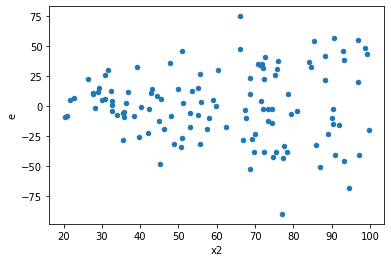

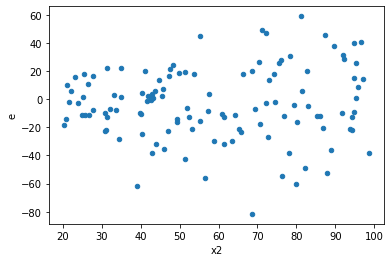

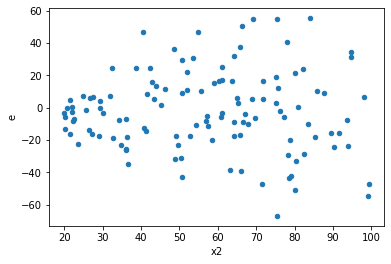

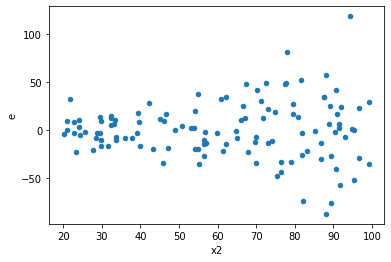

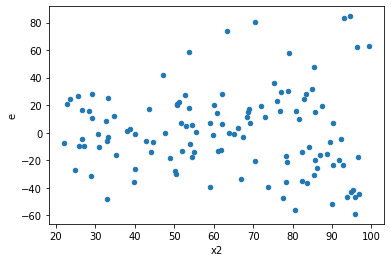

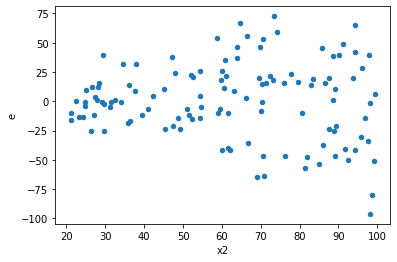

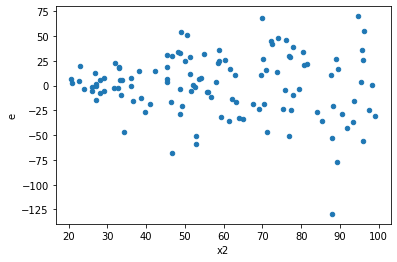

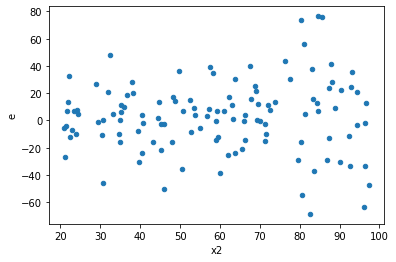

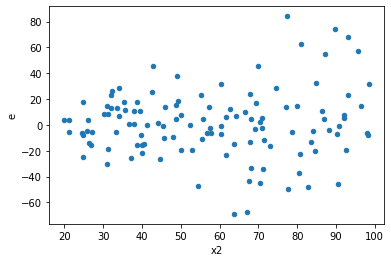

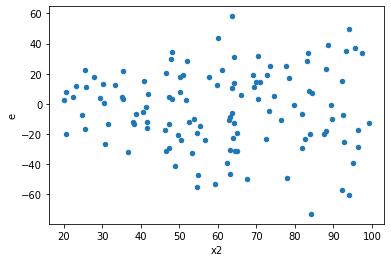

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,49.0,67.0,40773.00985830213,57969.655377689494,832.102242006166,865.2187369804402,1.0397985888061443,0.8728019899187216,0.5635990050406392,0.4364009949593608,Reject001=1 : Homoscedasticity
4.0,65.0,51.0,57875.804359300884,48216.94792516878,890.3969901430905,945.4303514738976,1.0618076677482513,0.8299535616844369,0.5850232191577815,0.41497678084221845,Reject001=1 : Homoscedasticity
5.0,46.0,70.0,13039.271102834355,100426.10161464529,283.4624152790077,1434.6585944949327,5.061195125578889,1.4322414365608438e-09,0.9999999992838793,7.161207182804219e-10,Reject001=0 : Heteroscedasticity
7.0,53.0,63.0,21311.65089641878,58681.03693167094,402.1066206871468,931.4450306614435,2.3164130674340244,0.0015091240010083329,0.9992454379994958,0.0007545620005041664,Reject001=0 : Heteroscedasticity
8.0,59.0,57.0,39048.6680072848,40062.641118891144,661.8418306319459,702.8533529630025,1.0619657453381235,0.8209306351621324,0.5895346824189338,0.4104653175810662,Reject001=1 : Homoscedasticity
10.0,50.0,66.0,30234.22780938005,71993.77190016826,604.684556187601,1090.8147257601252,1.803940111580598,0.024971096918775748,0.9875144515406121,0.012485548459387874,Reject001=1 : Homoscedasticity
13.0,57.0,59.0,16923.992909641693,62283.13013917375,296.91215630950336,1055.6462735453179,3.5554161428301527,2.8904792026551718e-06,0.9999985547603987,1.4452396013275859e-06,Reject001=0 : Heteroscedasticity
16.0,54.0,62.0,19726.4237130232,52207.20872181004,365.30414283376297,842.0517535775813,2.305070364232823,0.0016326280332639165,0.999183685983368,0.0008163140166319582,Reject001=0 : Heteroscedasticity
17.0,57.0,59.0,30379.797575674635,40761.369758346795,532.9789048363971,690.8706738702847,1.2962439368634187,0.32486324354677887,0.8375683782266106,0.16243162177338943,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,49.0,67.0,40773.00985830213,57969.655377689494,832.102242006166,865.2187369804402,1.0397985888061443,0.8728019899187216,Reject001=1 : Homoscedasticity
1.0,53.0,63.0,49630.49090463579,24811.573248343073,936.4243566912414,393.8344960054456,0.42057267433433604,0.001484862911089966,Reject001=0 : Heteroscedasticity
2.0,53.0,63.0,34542.90809512922,34140.79056243667,651.7529829269664,541.9173105148677,0.8314765328440291,0.4919570330090105,Reject001=1 : Homoscedasticity
3.0,62.0,54.0,90235.45496541314,14578.01753137655,1455.4105639582765,269.9632876180843,0.18548943803449233,7.375781219201087e-10,Reject001=0 : Heteroscedasticity
4.0,65.0,51.0,57875.804359300884,48216.94792516878,890.3969901430905,945.4303514738976,1.0618076677482513,0.8299535616844369,Reject001=1 : Homoscedasticity
5.0,46.0,70.0,13039.271102834355,100426.10161464529,283.4624152790077,1434.6585944949327,5.061195125578889,1.4322414365608438e-09,Reject001=0 : Heteroscedasticity
6.0,52.0,64.0,74903.34648545193,35075.96583372273,1440.4489708740755,548.0619661519177,0.3804799595360532,0.00044328352938330476,Reject001=0 : Heteroscedasticity
7.0,53.0,63.0,21311.65089641878,58681.03693167094,402.1066206871468,931.4450306614435,2.3164130674340244,0.0015091240010083329,Reject001=0 : Heteroscedasticity
8.0,59.0,57.0,39048.6680072848,40062.641118891144,661.8418306319459,702.8533529630025,1.0619657453381235,0.8209306351621324,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      505
Reject001=0 : Heteroscedasticity    495
Name: Result_test, dtype: int64